# Data Analysis of Data Analysts

Project 1

In [1]:
# Dependencies and Setup
import os
import csv
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from scipy.stats import sem
from scipy.stats import linregress
import scipy.stats as st
import numpy as np
import requests
import json

#Import Heatmap Library
import hvplot.pandas
import folium
from folium.plugins import HeatMap
import cartopy.crs as ccrs

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

#Import the API key
from census import Census
from config import geoapify_key
from config import acct_id
from config import api_key

# File to Load (Remember to Change These)
#  = Path("../Resources/schools_complete.csv")
#  = Path("../Resources/students_complete.csv")

# Read School and Student Data File and store into Pandas DataFrames
#  = pd.read_csv(school_data_to_load)
#  = pd.read_csv(student_data_to_load)

# Combine the data into a single dataset.  

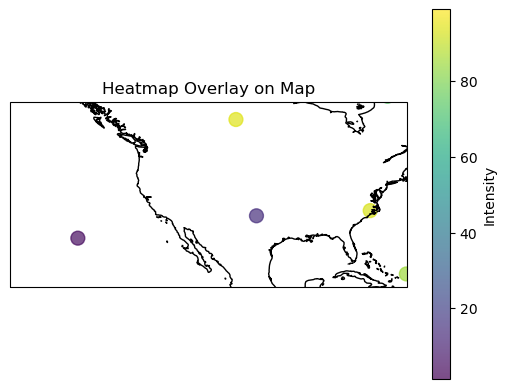

In [30]:
# # Generating random data for heatmap
# lons = np.random.uniform(low=-180, high=180, size=100)
# lats = np.random.uniform(low=-90, high=90, size=100)
# values = np.random.rand(100) * 100  # Random values for heatmap intensity

# # # Create a larger figure with a specified size
# # fig = plt.figure(figsize=(10000, 10000))

# # Create a figure and axis with a specific projection (e.g., PlateCarree)
# fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
# ax.set_extent([-150, -70, 20, 50]) 

# # Plot the heatmap using scatter with color gradient
# heatmap = ax.scatter(lons, lats, c=values, cmap='viridis', s=100, alpha=0.7,
#                      transform=ccrs.PlateCarree())

# # Add a colorbar to show intensity scale
# cbar = plt.colorbar(heatmap)
# cbar.set_label('Intensity')

# # Add coastlines for reference
# ax.coastlines()

# # Show the plot
# plt.title('Heatmap Overlay on Map')
# plt.show()

In [18]:
city_state = {
    'City': ["Atlanta", "Austin", "San Francisco", "New York City", "San Diego", "Boston", "Portland",
            "Seattle", "Los Angeles", "Chicago", "Denver", "Dallas"],
    'State': ["GA", "TX", "CA", "NY", "CA", "MA", "OR", "WA", "CA", "IL", "CO", "TX"]}
    
dataframe_1 = pd.DataFrame(city_state)
dataframe_1[['# of Analysts - City', 'Median Salary - City']] = ""

dataframe_1

,City,State,# of Analysts - City,Median Salary - City
0,Atlanta,GA,,
1,Austin,TX,,
2,San Francisco,CA,,
3,New York City,NY,,
4,San Diego,CA,,
5,Boston,MA,,
6,Portland,OR,,
7,Seattle,WA,,
8,Los Angeles,CA,,
9,Chicago,IL,,


In [19]:
# api_url = f'''https://api.careeronestop.org/v1/occupation/{acct_id}/Data%20Scientists/0?training=false
# &interest=false&videos=false&tasks=false&dwas=false&wages=true
# &alternateOnetTitles=false&projectedEmployment=false&ooh=false
# &stateLMILinks=false&relatedOnetTitles=false&skills=false&knowledge=false
# &ability=false&trainingPrograms=false'''

api_test_url = f'https://api.careeronestop.org/v1/occupation/{acct_id}/Data%20Scientists/Austin%2C%20TX?training=false&interest=false&videos=false&tasks=false&dwas=false&wages=true&alternateOnetTitles=false&projectedEmployment=true&ooh=false&stateLMILinks=false&relatedOnetTitles=false&skills=false&knowledge=false&ability=false&trainingPrograms=false'

headers = {"Authorization": f"Bearer {api_key}"}
response = requests.get(api_test_url, headers=headers).json()
# response

print(json.dumps(response, indent=4, sort_keys=True))

{
    "AutoCorrection": "",
    "DidYouMean": "",
    "OccupationDetail": [
        {
            "AlternateTitles": null,
            "BrightOutlook": "Bright",
            "BrightOutlookCategory": "Rapid Growth",
            "COSVideoURL": "https://www.careeronestop.org/Videos/careeronestop-videos.aspx?videocode=15205100&op=y",
            "Green": "No",
            "Location": "TX",
            "OnetCode": "15-2051.00",
            "OnetDescription": "Develop and implement a set of techniques or analytics applications to transform raw data into meaningful information using data-oriented programming languages and visualization software. Apply data mining, data modeling, natural language processing, and machine learning to extract and analyze information from large structured and unstructured datasets. Visualize, interpret, and report data findings. May create dynamic data reports.",
            "OnetTitle": "Data Scientists",
            "Projections": {
                "EstimatedYea

In [20]:
projected_jobs = response["OccupationDetail"][0]['Projections']['Projections'][0]['ProjectedEmployment']

In [21]:
# Use the city API request but alter the city and state based on the dataframe
# This allows us to search national, state, and city data all from the same call

base_url = city_url = f"https://api.careeronestop.org/v1/occupation/{acct_id}/Data%20Scientists/"
params = "?training=false&interest=true&videos=false&tasks=false&dwas=false&wages=true&alternateOnetTitles=false&projectedEmployment=true&ooh=false&stateLMILinks=false&relatedOnetTitles=false&skills=false&knowledge=false&ability=false&trainingPrograms=false"
headers = {"Authorization": f"Bearer {api_key}"}

In [22]:
for index, row in dataframe_1.iterrows():
    # Get the city and state
    city = dataframe_1.loc[index, "City"]
    state = dataframe_1.loc[index, "State"]
    # Add the current City type to the parameters
    api_url =  f"{base_url}{city}%2C%20{state}{params}"
    
    response_1 = requests.get(api_url, headers = headers).json()
    results = response_1['OccupationDetail'][0]['Wages']['BLSAreaWagesList']
#     results_2 = response["OccupationDetail"][0]['Projections']['Projections'][0]['ProjectedEmployment']

    try:
#         should we use estimated employment OR projected employment?
        projected_jobs = response_1["OccupationDetail"][0]['Projections']['Projections'][0]['EstimatedEmployment']
        dataframe_1.loc[index, '# of Analysts - City'] = projected_jobs
        
#         help from tutor
        median_salary = [x['Median'] for x in results if x['RateType']=='Annual' ][0] 
        dataframe_1.loc[index, 'Median Salary - City'] = median_salary    

    except (KeyError, IndexError):
        dataframe_1.loc[index, 'Median Salary - City'] = "Didnt find anything"
        dataframe_1.loc[index, '# of Analysts - City'] = "Didnt find anything"

dataframe_1

,City,State,# of Analysts - City,Median Salary - City
0,Atlanta,GA,"2,250",104060
1,Austin,TX,"4,110",105350
2,San Francisco,CA,"18,400",137680
3,New York City,NY,"3,500",130070
4,San Diego,CA,"18,400",123570
5,Boston,MA,"2,880",106670
6,Portland,OR,760,108130
7,Seattle,WA,"2,700",140560
8,Los Angeles,CA,"18,400",103430
9,Chicago,IL,"3,370",104370


In [23]:
#need to figure out how to pull specific city and state names
#maybe use itterow method
cities = ["San Francisco", "San Jose", "Austin"]
states = ["CA"]

base_url = f"https://api.careeronestop.org/v1/occupation/{acct_id}"
job = "Data%20Scientists"
params = "?training=false&interest=true&videos=false&tasks=false&dwas=false&wages=true" \
         "&alternateOnetTitles=false&projectedEmployment=true&ooh=false" \
         "&stateLMILinks=false&relatedOnetTitles=false&skills=false&knowledge=false" \
         "&ability=false&trainingPrograms=false"

api_urls = []

for city in cities:
#    for state in states:
        api_url = f"{base_url}/{job}/{city},%20{states}{params}"
        api_urls.append(api_url)

# for api_url in api_urls:
#     print(api_urls)

In [24]:
#Section 1b
#Linear regression (scatter-plot) - State population (census csv), 
# data analysts, per state, projected growth per state
all_state_pop = pd.read_csv('census_state_pop_20to22.csv', index_col='NAME')

all_state_pop

,SUMLEV,REGION,DIVISION,STATE,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,NPOPCHG_2020,NPOPCHG_2021,...,RDEATH2021,RDEATH2022,RNATURALCHG2021,RNATURALCHG2022,RINTERNATIONALMIG2021,RINTERNATIONALMIG2022,RDOMESTICMIG2021,RDOMESTICMIG2022,RNETMIG2021,RNETMIG2022
NAME,,,,,,,,,,,,,,,,,,,,,
United States,10,0,0,0,331449520,331511512,332031554,333287557,61992,520042,...,10.363828,10.350218,0.434073,0.736729,1.133397,3.038912,0.000000,0.000000,1.133397,3.038912
Northeast Region,20,1,0,0,57609156,57448898,57259257,57040406,-160258,-189641,...,9.780142,9.868918,0.206629,0.511200,1.402708,3.752662,-4.855348,-8.061896,-3.452640,-4.309234
New England,30,1,1,0,15116206,15074473,15121745,15129548,-41733,47272,...,9.530598,9.887115,-0.310502,-0.206669,1.770752,4.655140,1.546021,-3.767839,3.316773,0.887301
Middle Atlantic,30,1,2,0,42492950,42374425,42137512,41910858,-118525,-236913,...,9.869304,9.862369,0.391400,0.769581,1.271205,3.427836,-7.142565,-9.607444,-5.871360,-6.179608
Midwest Region,20,2,0,0,68985537,68961043,68836505,68787595,-24494,-124538,...,11.059195,11.169148,-0.207043,-0.125530,0.802714,2.111084,-2.645374,-2.529339,-1.842660,-0.418255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Washington,40,4,9,53,7705247,7724031,7740745,7785786,18784,16714,...,8.400898,9.117040,2.264113,1.737928,1.809144,4.831987,-1.990071,-0.461146,-0.180927,4.370841
West Virginia,40,3,5,54,1793755,1791420,1785526,1775156,-2335,-5894,...,15.341020,16.649619,-5.665727,-6.829029,0.406492,0.995877,1.602484,0.266241,2.008976,1.262118
Wisconsin,40,2,3,55,5893725,5896271,5880101,5892539,2546,-16170,...,10.496442,10.770227,-0.305357,-0.298659,0.541593,1.388643,-3.209987,1.300813,-2.668394,2.689456


In [25]:
pop22 = all_state_pop[['POPESTIMATE2022']]
#pop22
state_pop22_part1 = pop22[14:22]
state_pop22_part2 = pop22[23:65]

state_pop_clean = pd.concat([state_pop22_part1, state_pop22_part2], axis=0, ignore_index=False)
#print(state_pop_clean)

#return a line indicating the number of states included
#I guess this isn't really important since we'll be extracting state population by name
print(f'There are {len(state_pop_clean)} states in this dataset.\n')

#also want to convert state names to abbreviations
state_dict = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

#create new column to hold state abbreviations
state_pop_clean['State'] = ''
index = state_pop_clean.index
for index, row in state_pop_clean.iterrows():
    state_name = index
    state_abb = state_dict.get(state_name, 'Not Found')
    state_pop_clean.loc[index, 'State'] = state_abb

print(state_pop_clean)

There are 50 states in this dataset.

                POPESTIMATE2022 State
NAME                                 
Alabama                 5074296    AL
Alaska                   733583    AK
Arizona                 7359197    AZ
Arkansas                3045637    AR
California             39029342    CA
Colorado                5839926    CO
Connecticut             3626205    CT
Delaware                1018396    DE
Florida                22244823    FL
Georgia                10912876    GA
Hawaii                  1440196    HI
Idaho                   1939033    ID
Illinois               12582032    IL
Indiana                 6833037    IN
Iowa                    3200517    IA
Kansas                  2937150    KS
Kentucky                4512310    KY
Louisiana               4590241    LA
Maine                   1385340    ME
Maryland                6164660    MD
Massachusetts           6981974    MA
Michigan               10034113    MI
Minnesota               5717184    MN
Mississippi 

In [26]:
#need to merge population estimates with analyst count and salary dataframe
analysts_with_pop = pd.merge(dataframe_1, state_pop_clean, how='left', on='State')
analysts_with_pop = analysts_with_pop.rename(columns={'POPESTIMATE2022':'2022 Population Estimates'})
analysts_with_pop

,City,State,# of Analysts - City,Median Salary - City,2022 Population Estimates
0,Atlanta,GA,"2,250",104060,10912876
1,Austin,TX,"4,110",105350,30029572
2,San Francisco,CA,"18,400",137680,39029342
3,New York City,NY,"3,500",130070,19677151
4,San Diego,CA,"18,400",123570,39029342
5,Boston,MA,"2,880",106670,6981974
6,Portland,OR,760,108130,4240137
7,Seattle,WA,"2,700",140560,7785786
8,Los Angeles,CA,"18,400",103430,39029342
9,Chicago,IL,"3,370",104370,12582032


In [27]:
analysts_with_pop[['Latitude', 'Longitude']] = ""
analysts_with_pop

,City,State,# of Analysts - City,Median Salary - City,2022 Population Estimates,Latitude,Longitude
0,Atlanta,GA,"2,250",104060,10912876,,
1,Austin,TX,"4,110",105350,30029572,,
2,San Francisco,CA,"18,400",137680,39029342,,
3,New York City,NY,"3,500",130070,19677151,,
4,San Diego,CA,"18,400",123570,39029342,,
5,Boston,MA,"2,880",106670,6981974,,
6,Portland,OR,760,108130,4240137,,
7,Seattle,WA,"2,700",140560,7785786,,
8,Los Angeles,CA,"18,400",103430,39029342,,
9,Chicago,IL,"3,370",104370,12582032,,


In [28]:
#Create a DataFrame for Target States and Target States' urls
target_states = []
target_states_urls = []

#Iterate through all rows in dataframe_1
for index, row in dataframe_1.iterrows():
    # Get the states
    target_states = dataframe_1.loc[index, "State"]
    print(target_states)
    for state in target_states:
        #Build the endpoint url
        state_url = f"https://api.geoapify.com/v1/geocode/autocomplete?text={state}&format=json&apiKey={geoapify_key}"
        print(state_url)
#         target_states_urls.append(state_url)
        
#     print(target_states_urls)


# # # Run a request to endpoint and convert result to json
# # response = requests.get(target_states_urls)

# # Print the json (pretty printed)
# for target_state in target_states_urls:
# #     print(target_states_urls)
#     print(json.dumps(target_states_urls, indent=4, sort_keys=True))

GA
https://api.geoapify.com/v1/geocode/autocomplete?text=G&format=json&apiKey=8991e51c42ee406db59b82f123a5d11c
https://api.geoapify.com/v1/geocode/autocomplete?text=A&format=json&apiKey=8991e51c42ee406db59b82f123a5d11c
TX
https://api.geoapify.com/v1/geocode/autocomplete?text=T&format=json&apiKey=8991e51c42ee406db59b82f123a5d11c
https://api.geoapify.com/v1/geocode/autocomplete?text=X&format=json&apiKey=8991e51c42ee406db59b82f123a5d11c
CA
https://api.geoapify.com/v1/geocode/autocomplete?text=C&format=json&apiKey=8991e51c42ee406db59b82f123a5d11c
https://api.geoapify.com/v1/geocode/autocomplete?text=A&format=json&apiKey=8991e51c42ee406db59b82f123a5d11c
NY
https://api.geoapify.com/v1/geocode/autocomplete?text=N&format=json&apiKey=8991e51c42ee406db59b82f123a5d11c
https://api.geoapify.com/v1/geocode/autocomplete?text=Y&format=json&apiKey=8991e51c42ee406db59b82f123a5d11c
CA
https://api.geoapify.com/v1/geocode/autocomplete?text=C&format=json&apiKey=8991e51c42ee406db59b82f123a5d11c
https://api.g

In [ ]:
# Create a Pandas DataFrame containing state coordinates
state_coordinates = pd.DataFrame()

# Display sample data
state_coordinates

In [18]:
# DataFrame 'state_coordinates' containing latitude, longitude, and Population data

# Create a base map
heatmap_plot = folium.Map(location=[state_coordinates['latitude'].mean(), state_coordinates['longitude'].mean()], zoom_start=4)

# Create a list of heat points (latitude, longitude, weight/population)
heat_data = [[row['latitude'], row['longitude'], row['Population']] for _, row in state_coordinates.iterrows()]

# Plot heatmap using Folium's HeatMap function
HeatMap(heat_data, radius=15).add_to(heatmap_plot)

# Save the map as an HTML file
output_file = "heatmap_with_colorbar.html"
heatmap_plot.save(output_file)

# Create a legend using HTML and CSS
legend_html = '''
<div style="position: fixed;
             bottom: 50px; left: 50px; width: 120px; height: 150px; 
             background-color: rgba(255, 255, 255, 0.7);
             z-index:9999; font-size:14px; border-radius:5px;
             border:1px solid grey; padding: 10px;">
    <strong>Color Legend</strong><br>
    <div style="background: linear-gradient(to bottom, red, yellow, green); 
                width: 100%; height: 80px;"></div>
    <small>Low</small> <small style="float:right;">High</small>
</div>
'''

# Add the legend to the map HTML file
with open(output_file, 'r') as f:
    map_html = f.read()

with open(output_file, 'w') as f:
    map_html = map_html.replace('</body>', legend_html + '</body>')
    f.write(map_html)
    
# Display the map in the notebook
from IPython.display import IFrame

IFrame(output_file, width='100%', height=500)

NameError: name 'coordinates_df' is not defined

In [ ]:
# Configure the map plot_1
map_plot_1 = state_coordinates.hvplot.points(
    "longitude",
    "latitude",
    geo = True,
    tiles = "EsriNatGeo",
    frame_width = 700,
    frame_height = 500,
    size = "Population",
    scale = 0.01,
    color = "City"
)

# Display the map plot
map_plot_1